In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/sa2/Desktop/TKH/Financial-Fraud-Detection/data/raw/PS_20174392719_1491204439457_log.csv")

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Univariate Analysis

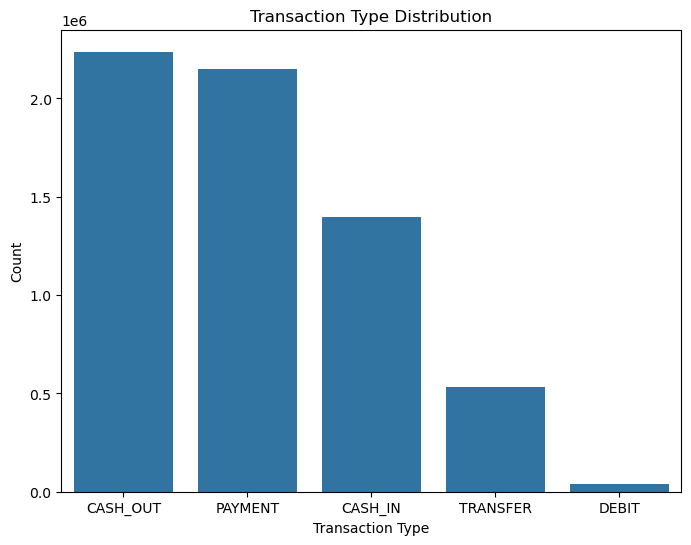

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type Distribution')
plt.show()

cashout and payment most common

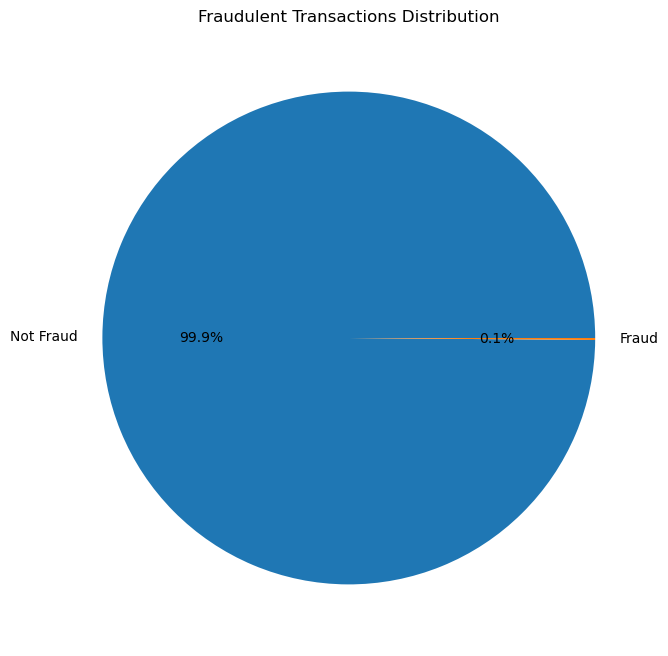

In [12]:
plt.figure(figsize=(10, 8))
df["isFraud"].value_counts().plot.pie(autopct='%1.1f%%', labels=["Not Fraud", "Fraud"])
plt.title("Fraudulent Transactions Distribution")
plt.ylabel("")
plt.show()

In [25]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

8213/6.3 million rows contain fraud

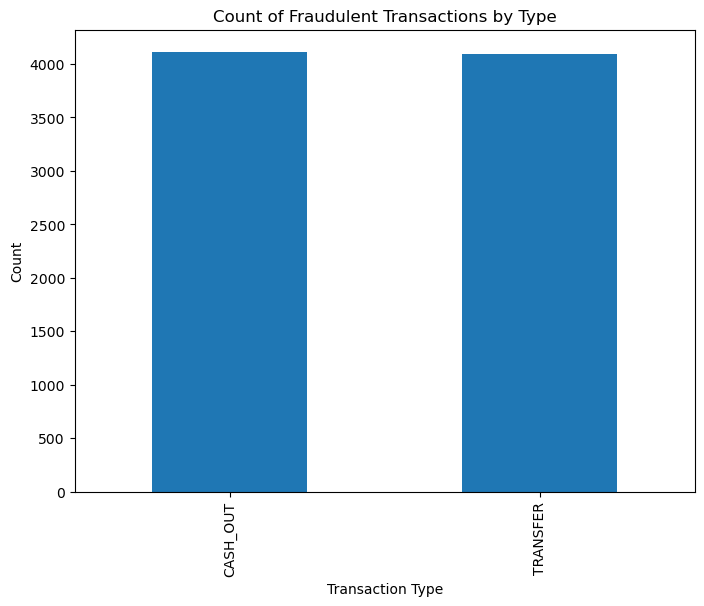

In [37]:
plt.figure(figsize=(8, 6))
df[df['isFraud'] == 1]['type'].value_counts().plot(kind='bar')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Count of Fraudulent Transactions by Type")
plt.show()

only cashout and transfer transactions contained transactions labeled as fraud

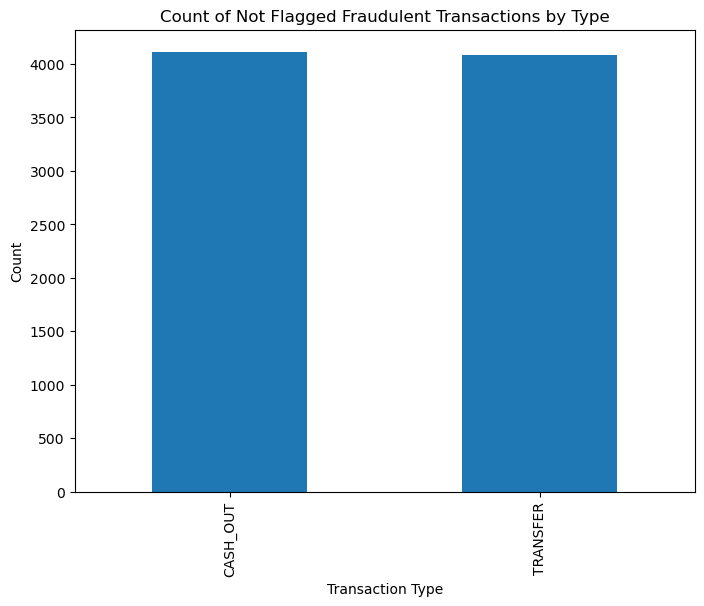

In [67]:
plt.figure(figsize=(8, 6))
df[(df["isFraud"] == 1) & (df["isFlaggedFraud"] == 0)]['type'].value_counts().plot(kind='bar')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Count of Not Flagged Fraudulent Transactions by Type")
plt.show()

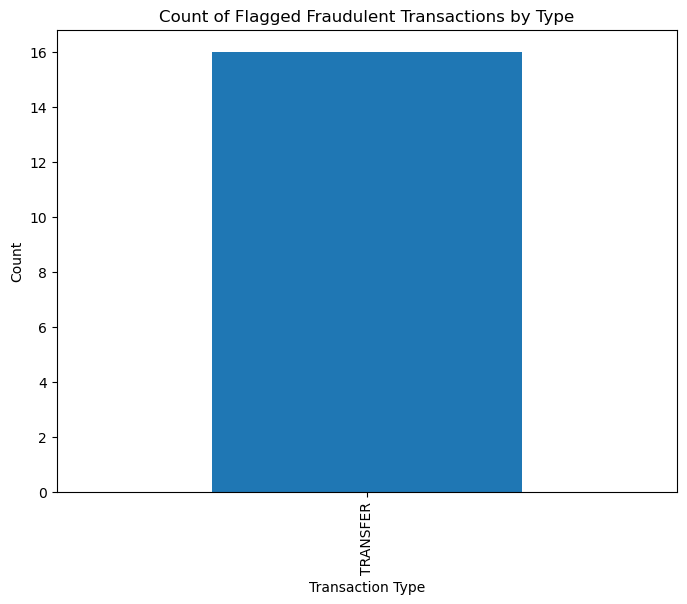

In [58]:
plt.figure(figsize=(8, 6))
df[df['isFlaggedFraud'] == 1]['type'].value_counts().plot(kind='bar')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Count of Flagged Fraudulent Transactions by Type")
plt.show()

In [68]:
flagged = df[df["isFlaggedFraud"] == 1]
notflaggedtransfer = df[(df["isFraud"] == 1) & (df["isFlaggedFraud"] == 0) & (df["type"] == "TRANSFER")]

In [69]:
flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [70]:
notflaggedtransfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


only tansfer is fraud and flagged; however only a small portion of transfer is detected 
- 16/8213 (fraud transactions which is marked as fraud)
- 16/4081 (transfer fraud transactions which is marked as fraud)

The origin accounts balance after the transaction for transfers that where not flagged are zero

# Bivariate Analysis

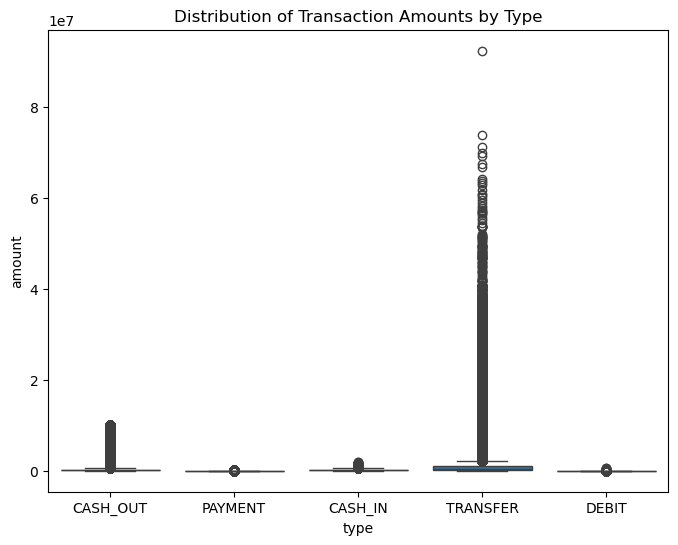

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='amount', order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Amounts by Type')
plt.show()

cashout and transfer transactions contain the majority of outliers

# Multivariate Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


learning what columns to drop, keeping only numerical

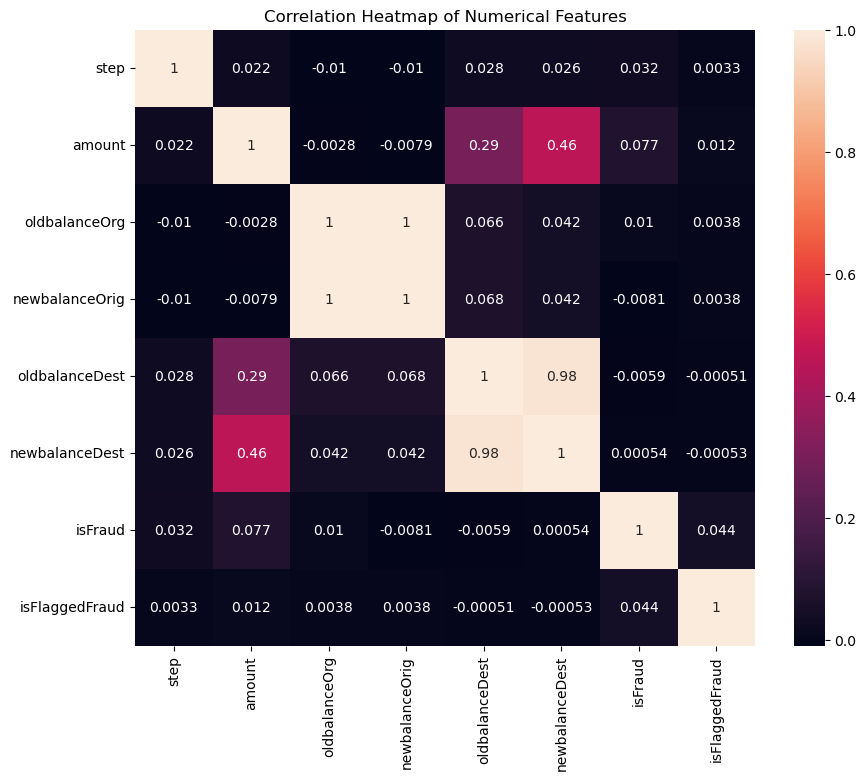

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['type', 'nameOrig', 'nameDest']).corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- each variable is perfectly correlated with itself
- oldbalanceDest and newbalanceDest have a strong positive correlation (0.98), the destination balance does not change after transactions
- amount and newbalanceDest has a moderate positive correlation (0.46), higher transaction amounts result in changes in the destination balance
- isFraud has a low correlation with most features (≤ 0.077)
- step (time) has very little correlation with fraud, fraudulent transactions dont really depend on when

correlation between oldbalanceDest and newbalanceDest indicates that transactions might not affect the recipient’s balance, possibly due to failed or flagged transactions. There is not much relation between features, probably depends on the type of transaction and amount.

# CASH_OUT and TRANSFER

In [28]:
df_filtered = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

cashout has more transactions than transfer (1st graph) but both have equal amount of fruadent transactions (3rd graph)

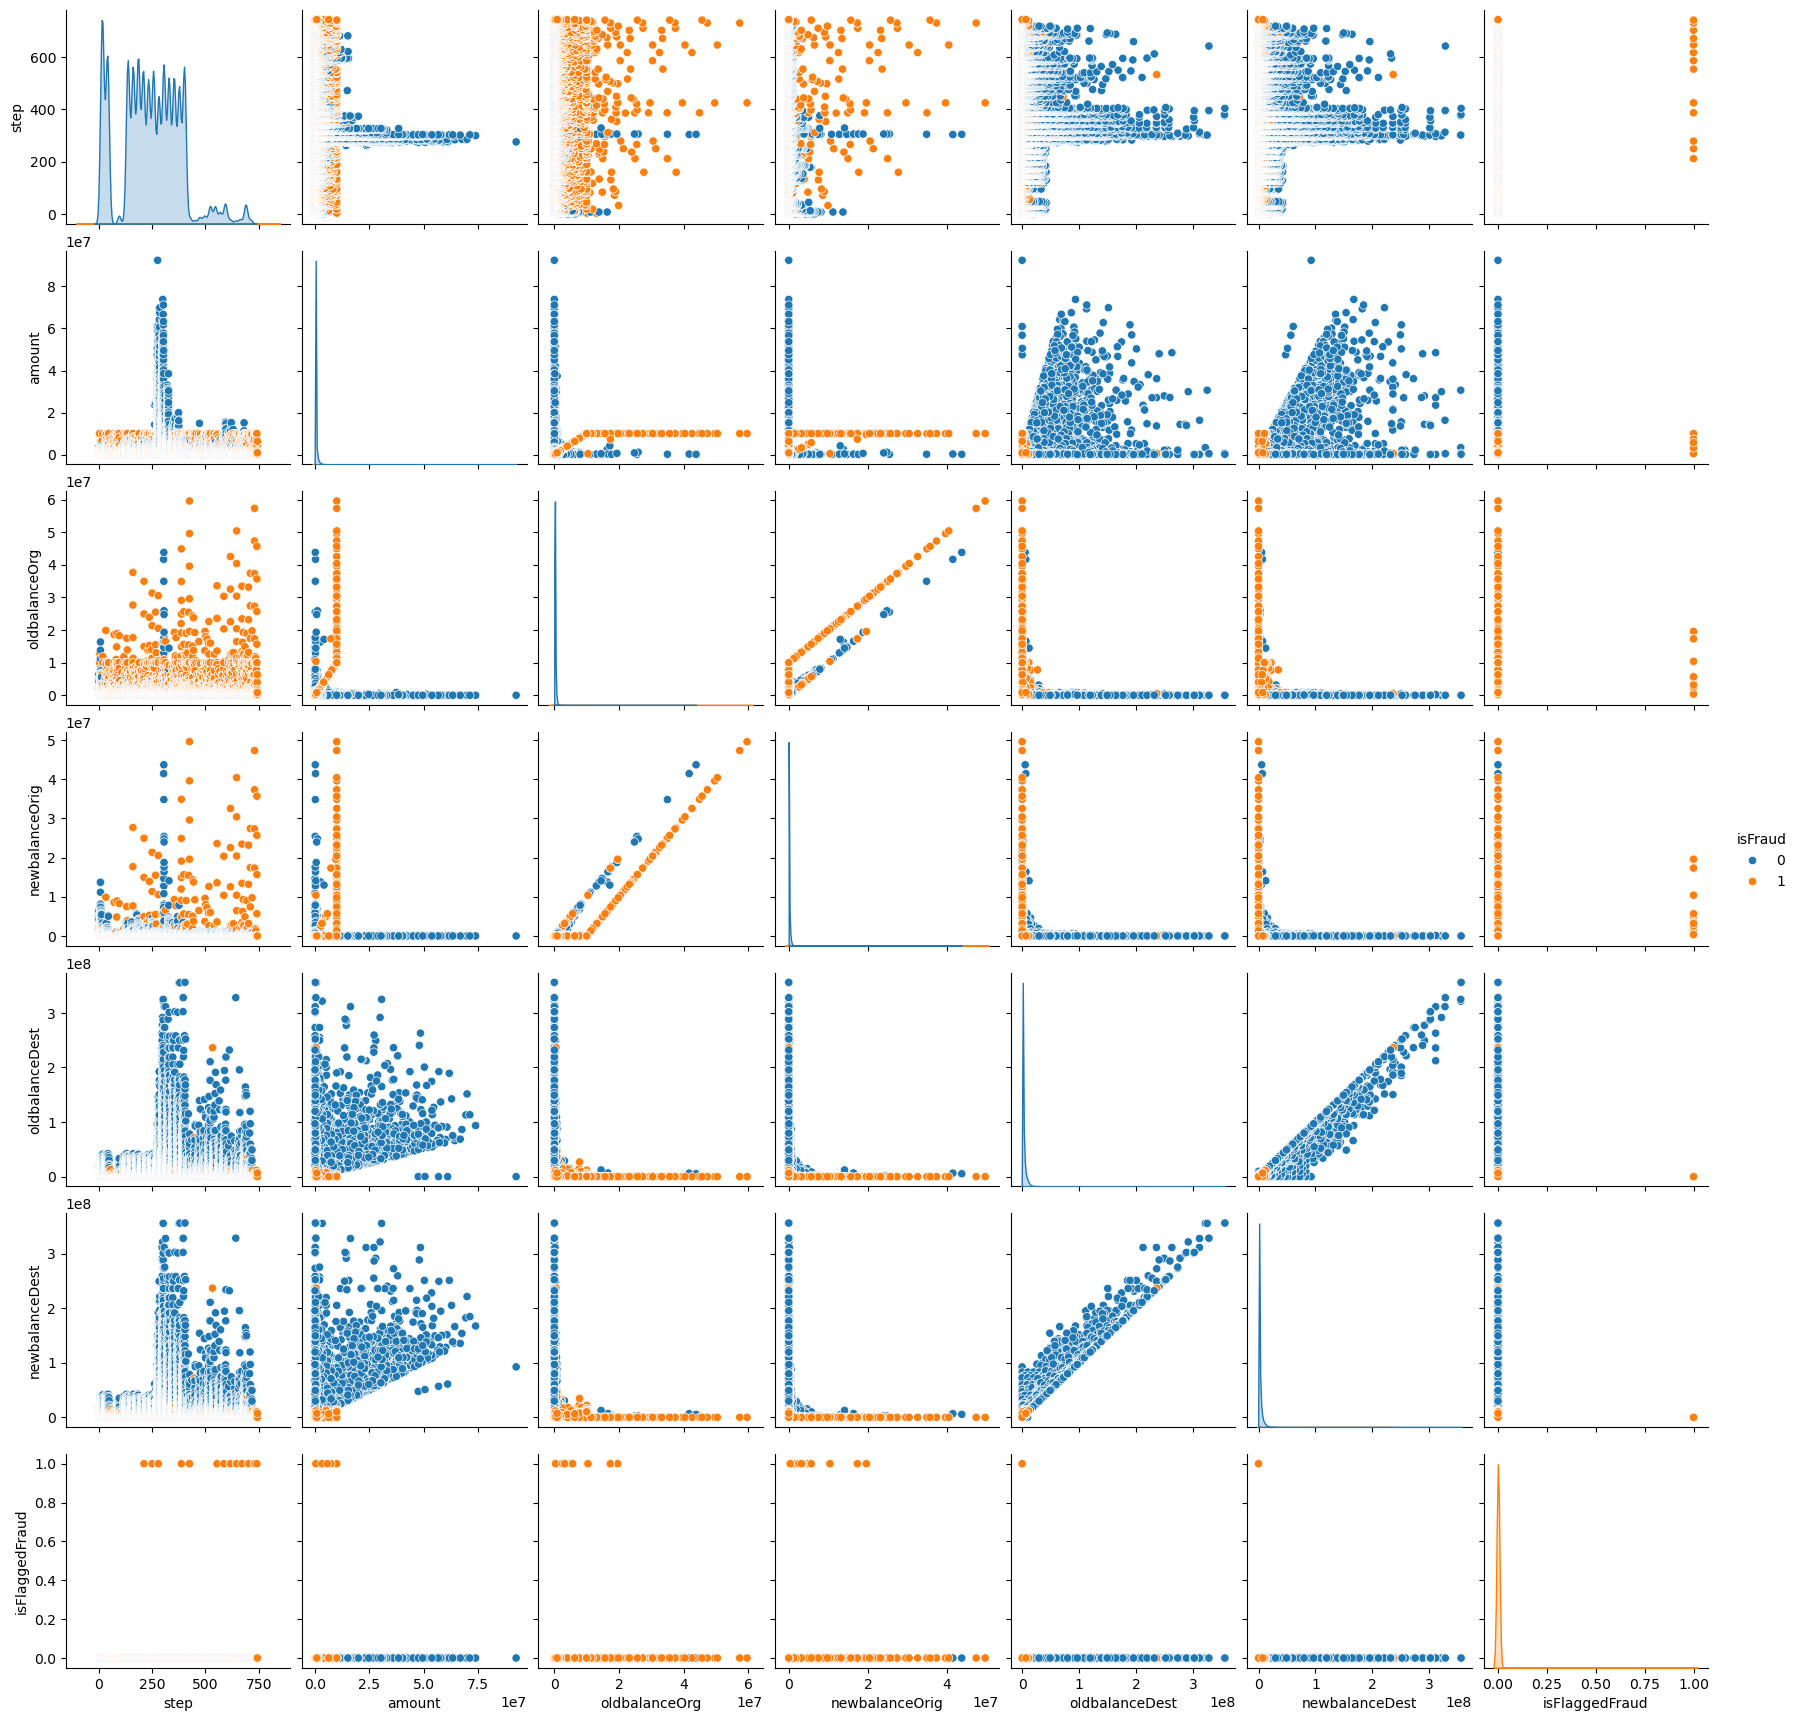

In [71]:
sns.pairplot(df_filtered.drop(columns=['nameOrig', 'nameDest']), hue='isFraud')
plt.show()

fraud amount is low 

fraud appears in specific regions(distinct patterns?)

Diagonal lines in:
- oldbalanceOrg vs. newbalanceOrig
- oldbalanceDest vs. newbalanceDest

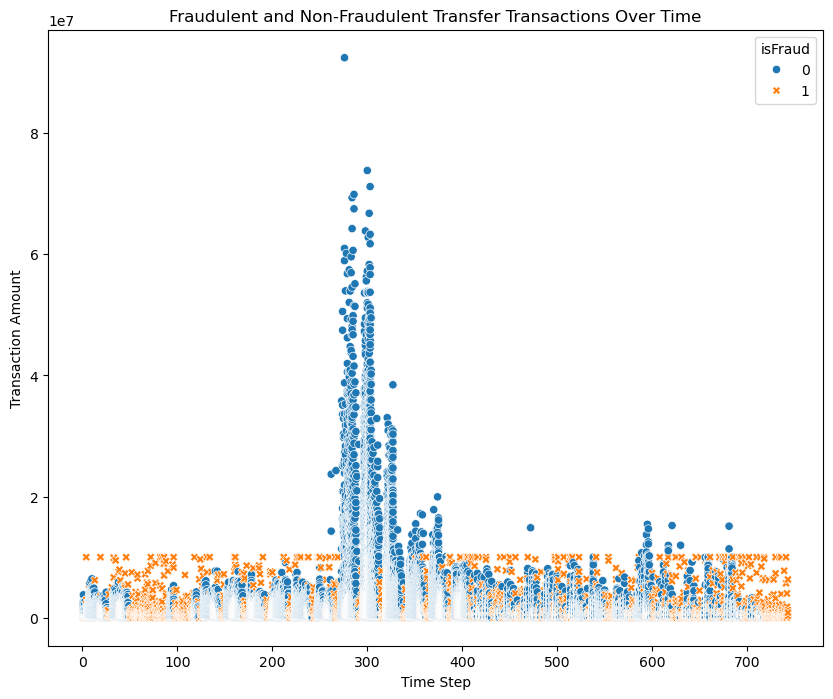

In [46]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_filtered[df_filtered["type"] == "TRANSFER"], x='step', y='amount', hue='isFraud', style='isFraud')
plt.xlabel('Time Step')
plt.ylabel('Transaction Amount')
plt.title('Fraudulent and Non-Fraudulent Transfer Transactions Over Time')
plt.show()

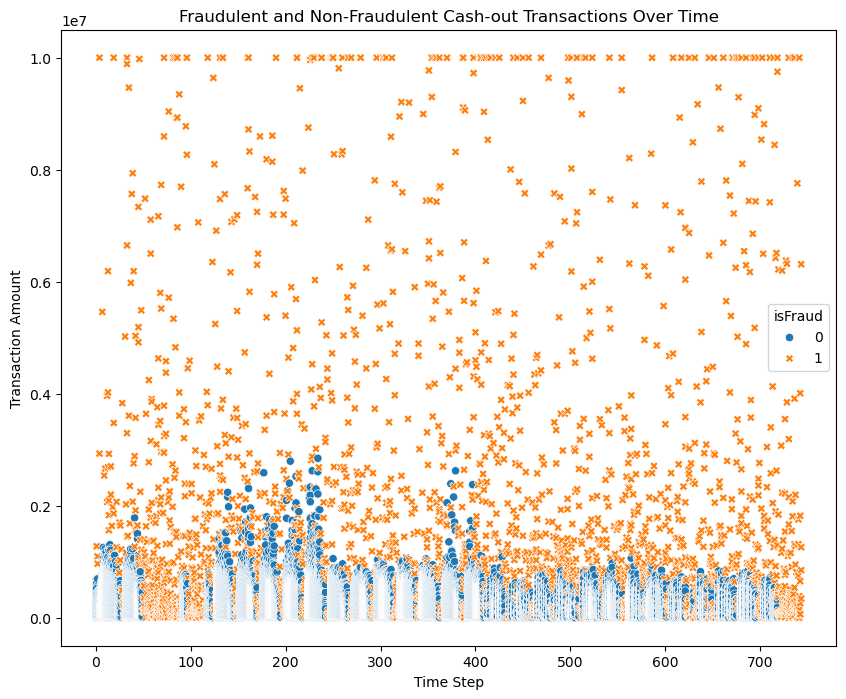

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_filtered[df_filtered["type"] == "CASH_OUT"], x='step', y='amount', hue='isFraud', style='isFraud')
plt.xlabel('Time Step')
plt.ylabel('Transaction Amount')
plt.title('Fraudulent and Non-Fraudulent Cash-out Transactions Over Time')
plt.show()

In [140]:
df_amountfiltered = df_filtered[(df_filtered["isFraud"] == 1) & (df_filtered["type"] == "TRANSFER")]
df_amountfiltered



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [141]:
df_amountfiltered.max()

step                      743
type                 TRANSFER
amount             10000000.0
nameOrig           C998593582
oldbalanceOrg     59585040.37
newbalanceOrig    49585040.37
nameDest           C999708230
oldbalanceDest     2122336.55
newbalanceDest     3217683.65
isFraud                     1
isFlaggedFraud              1
dtype: object

In [142]:
df_amountfilteredd = df_filtered[(df_filtered["isFraud"] == 1) & (df_filtered["type"] == "CASH_OUT")]
df_amountfilteredd

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [143]:
df_amountfiltered.max()

step                      743
type                 TRANSFER
amount             10000000.0
nameOrig           C998593582
oldbalanceOrg     59585040.37
newbalanceOrig    49585040.37
nameDest           C999708230
oldbalanceDest     2122336.55
newbalanceDest     3217683.65
isFraud                     1
isFlaggedFraud              1
dtype: object

transfer graph:
- peak transaction amounts between 250-400, period of high-value transactions (mostly non-fraudulent)
- fraudulent transactions are lower in amount
- fraudulent transfer transactionsare evenly distributed over time

cashout graph:
- fraudulent transactions largely have higher transaction amounts, non-fraudulent transactions are lower
- compared to transfer transactions, cash-out transactions have more fraudulent transactions
- fraudulent cashout transactions happen more consistently across time

fraud dosent occur above 10000000

In [124]:
dfoo = df_filtered[df_filtered["amount"] == 10000000]
dfoo

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
4441,4,CASH_OUT,10000000.0,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1,0
481250,19,TRANSFER,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.00,0.00,C1622860679,504326.62,10342417.90,1,0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362579,741,CASH_OUT,10000000.0,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0
6362580,741,TRANSFER,10000000.0,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362581,741,CASH_OUT,10000000.0,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0
6362582,741,TRANSFER,10000000.0,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


In [161]:
transferdfoo = dfoo[(dfoo["type"] == "TRANSFER") & (dfoo["oldbalanceDest"] == dfoo["newbalanceDest"])]
transferdfoo

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1,0
481250,19,TRANSFER,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.0,0.0,1,0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.0,0.0,1,0
1030559,72,TRANSFER,10000000.0,C53057884,18594065.09,8594065.09,C588547519,0.0,0.0,1,0
1030661,82,TRANSFER,10000000.0,C1237313447,10987591.59,987591.59,C1468356154,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.0,C412961249,11314660.84,1314660.84,C253674970,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362578,741,TRANSFER,10000000.0,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0
6362580,741,TRANSFER,10000000.0,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0


In [175]:
transferall = df_filtered[(df_filtered["type"] == "TRANSFER") & (df_filtered["oldbalanceDest"] == df_filtered["newbalanceDest"])]
transferall

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [169]:
cashoutdfoo = dfoo[(dfoo["type"] == "CASH_OUT") & (dfoo["amount"] == dfoo["oldbalanceOrg"])]
cashoutdfoo

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4441,4,CASH_OUT,10000000.0,C351297720,10000000.0,0.0,C766681183,0.00,9941904.21,1,0
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.0,0.0,C1622860679,504326.62,10342417.90,1,0
586312,33,CASH_OUT,10000000.0,C29118015,10000000.0,0.0,C1379703840,0.00,10000000.00,1,0
1030560,72,CASH_OUT,10000000.0,C1438388258,10000000.0,0.0,C1089455271,81810.42,10081810.42,1,0
1030662,82,CASH_OUT,10000000.0,C1079335762,10000000.0,0.0,C615227407,373274.84,10373274.84,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362529,736,CASH_OUT,10000000.0,C1842402025,10000000.0,0.0,C1291939349,0.00,10000000.00,1,0
6362577,741,CASH_OUT,10000000.0,C421958672,10000000.0,0.0,C2034016962,0.00,10000000.00,1,0
6362579,741,CASH_OUT,10000000.0,C1647199421,10000000.0,0.0,C2077145577,35922.97,10035922.97,1,0
6362581,741,CASH_OUT,10000000.0,C677394894,10000000.0,0.0,C1866259073,0.00,10000000.00,1,0


In [170]:
cashoutall = df_filtered[(df_filtered["type"] == "CASH_OUT") & (df_filtered["amount"] == df_filtered["oldbalanceOrg"])]
cashoutall

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
1116,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.00,7550.03,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [171]:
transferfraudcount = transferall[transferall["isFraud"] == 1].shape[0]
cashoutfraudcount = cashoutall[cashoutall["isFraud"] == 1].shape[0]

fraudtransfer = df_filtered[(df_filtered["type"] == "TRANSFER") & (df_filtered["isFraud"] == 1)].shape[0]
fraudcashout = df_filtered[(df_filtered["type"] == "CASH_OUT") & (df_filtered["isFraud"] == 1)].shape[0]

# Compute capture rate
transfer_capture_rate = (transferfraudcount / fraudtransfer) * 100
cashout_capture_rate = (cashoutfraudcount / fraudcashout) * 100

In [172]:
transfer_capture_rate


99.2921649987796

In [173]:
cashout_capture_rate

99.39261418853256

transfer transactions:
oldbalanceDest and newbalanceDest relationship being equal captures 99.29% of fraudulent transfer transactions

cashout transactions:
amount and oldbalanceOrg relationship being equal captures 99.39% of fraudulent transfer transactions

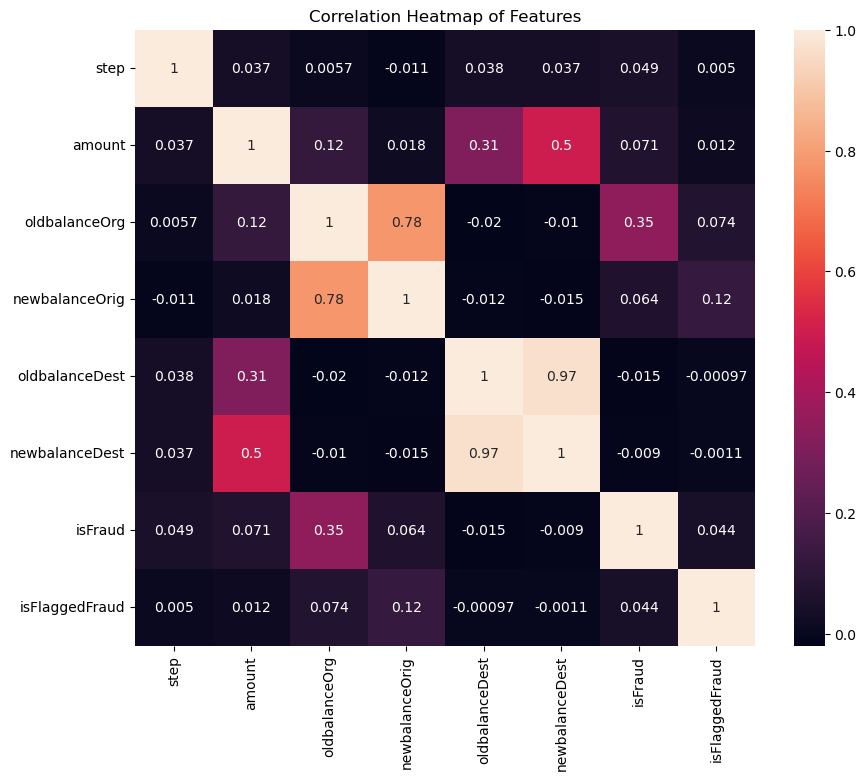

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered.drop(columns=['type', 'nameOrig', 'nameDest']).corr(), annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

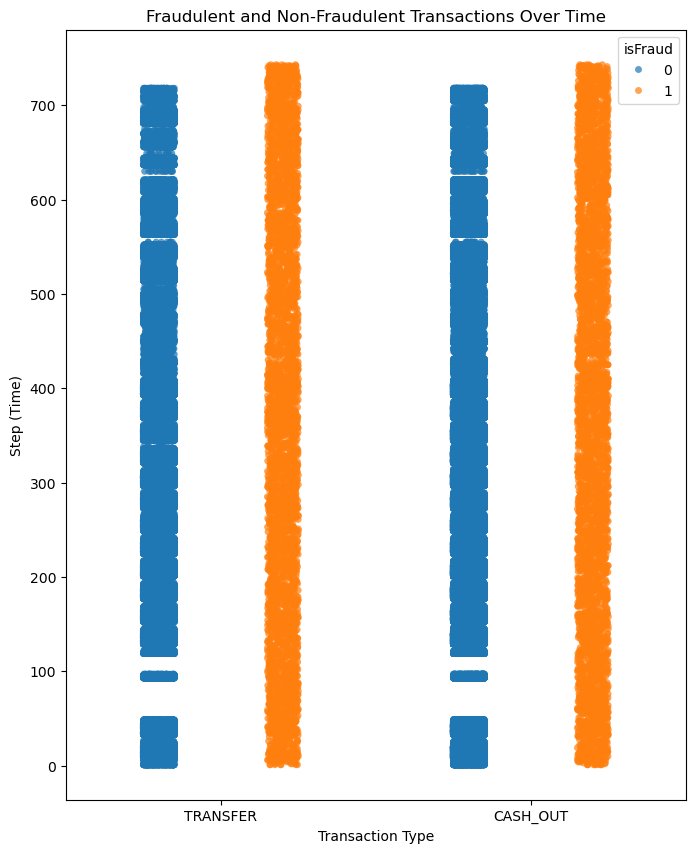

In [108]:
plt.figure(figsize=(8, 10))

# Create the strip plot
sns.stripplot(data=df_filtered, x='type', y='step', hue='isFraud', jitter=True, dodge=True, alpha=0.7)

# Add labels and title
plt.xlabel('Transaction Type')
plt.ylabel('Step (Time)')
plt.title('Fraudulent and Non-Fraudulent Transactions Over Time')

# Add legend
plt.legend(title='isFraud', loc='upper right')

# Show plot
plt.show()

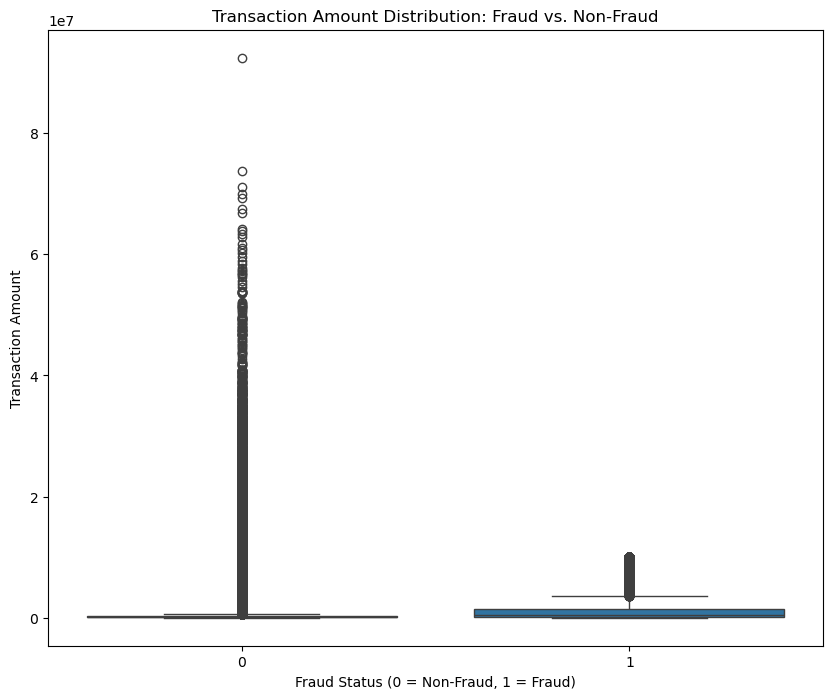

In [76]:
plt.figure(figsize=(10, 8))
#sns.boxplot(data=df_filtered, x="isFraud", y="amount", showfliers=False)
sns.boxplot(data=df_filtered, x="isFraud", y="amount")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
#plt.yscale("log") 
plt.show()


The median line inside each box shows the central tendency of transaction amounts.
The spread of the box (IQR) represents the middle 50% of transactions.
The whiskers show the general range of amounts, while extreme values are considered outliers.
If fraudulent transactions have a significantly different distribution (e.g., higher/lower median or wider spread), that suggests fraud detection can be based on amount patterns.

If fraudulent transactions tend to be higher or lower in value compared to non-fraudulent ones.
If there are outliers (extreme values that could be red flags).

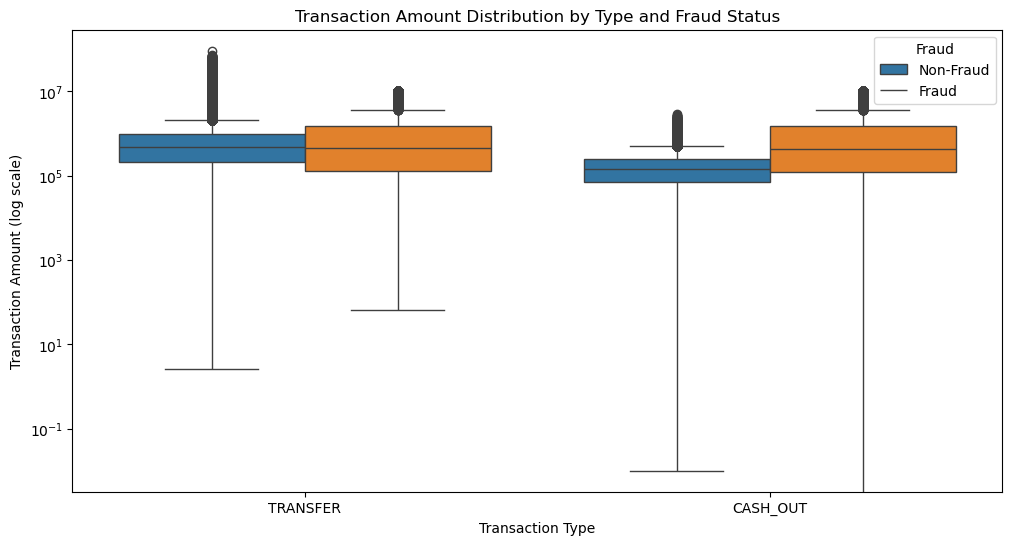

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="type", y="amount", hue="isFraud", data=df_filtered)
plt.yscale("log")  # Log scale to see differences more clearly
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount (log scale)")
plt.title("Transaction Amount Distribution by Type and Fraud Status")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])
plt.show()


What to look for?

Which transaction types have higher fraudulent amounts.
Whether certain transaction types are more fraud-prone than others.

What to look for?

Which features are highly correlated with fraud?
If any strong correlations suggest potential feature engineering opportunities.

What to look for?

Which transaction types have the highest fraud counts.
If fraud is more common in specific types, like CASH_OUT.

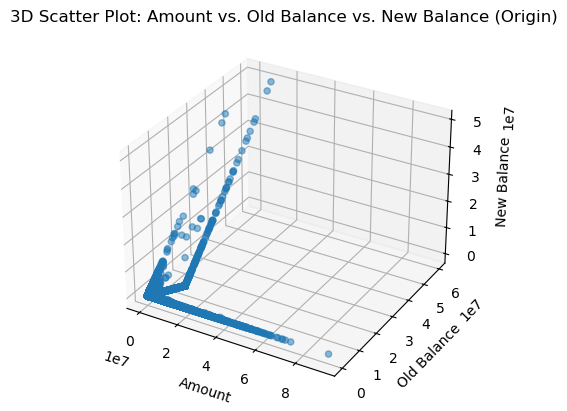

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_filtered['amount'], df_filtered['oldbalanceOrg'], df_filtered['newbalanceOrig'], alpha=0.5)
ax.set_xlabel('Amount')
ax.set_ylabel('Old Balance')
ax.set_zlabel('New Balance')

ax.set_title('3D Scatter Plot: Amount vs. Old Balance vs. New Balance (Origin)')
plt.show()

     This suggests that, in some cases, fraudulent transactions leave clear traces where balances drop to zero.